In [16]:
from IPython.core.display import display_html
from urllib.request import urlopen

display_html(urlopen('http://bit.ly/1HflmO9').read(), raw=True)

In [17]:
from sympy import var, sin, cos, Matrix, Integer, eye, Function, Rational, exp, Symbol, I, solve, trigsimp, integrate
from sympy.physics.mechanics import mechanics_printing
mechanics_printing()

In [18]:
var("x t h θ s ω")

In [20]:
k1 = Symbol("k1",Real=True, Imag=False)
k2 = Symbol("k2", Real=True, Imag=False)

In [21]:
A1 = Matrix([[0, 1], [-1, 0]])
B1 = Matrix([[0], [1]])
K1 = Matrix([[k1, k2]])

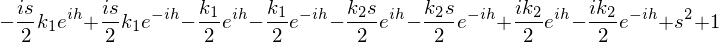

In [22]:
CP = (s*eye(2) - A1 - exp(-A1*h)*B1*K1).det()
CP

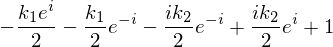

In [23]:
CP.subs(s, 0).subs(h, 1)

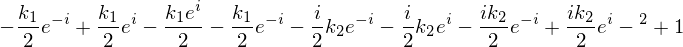

In [24]:
CP.subs(s, I*ω).subs(h, 1)

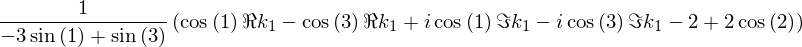

In [25]:
cpre = solve(CP.subs(s, 0).subs(h, 1), k2)
cpre[0].expand(complex=True).simplify()

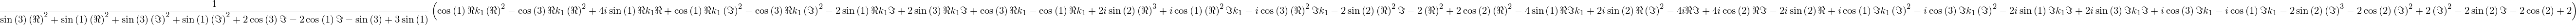

In [26]:
cpim = solve(CP.subs(s, I*ω).subs(h, 1), k2)
cpim[0].expand(complex=True).simplify()

In [27]:
exp(I).expand(complex=True)

In [28]:
from numpy import cos, sin, linspace, tan

In [29]:
%matplotlib inline
from matplotlib.pyplot import plot, style, figure
style.use("ggplot")

In [30]:
k_1 = linspace(-10, 10, 100)

In [31]:
k_2 = (k_1*cos(1) - 1)/sin(1)

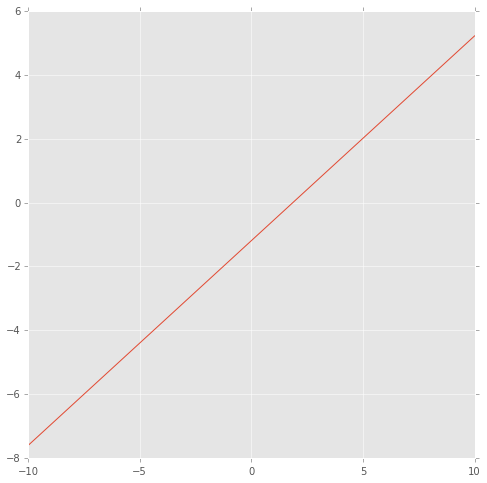

In [32]:
fig = figure(figsize=(8, 8))
plot(k_1, k_2);

In [33]:
om = linspace(-1000, 1000, 10000)

In [34]:
k_1p = (om**2 - 1)/(-cos(1) - tan(1)*sin(1))
k_2p = k_1p*tan(1)

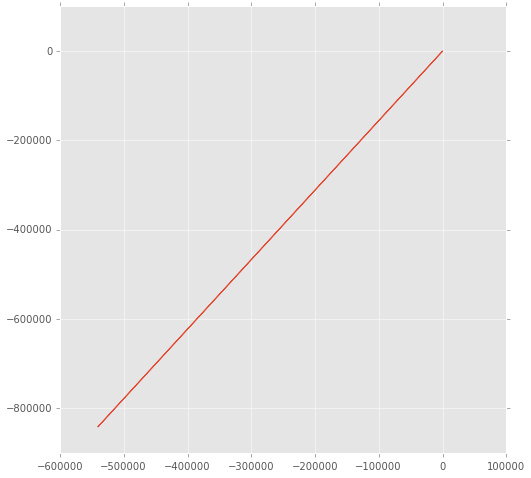

In [35]:
fig = figure(figsize=(8, 8))
plot(k_1p, k_2p);

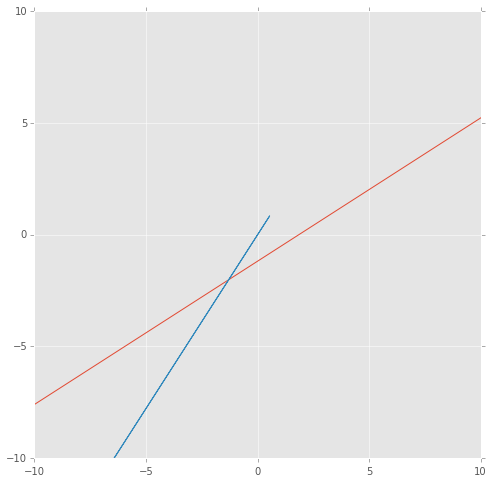

In [36]:
fig = figure(figsize=(8, 8))
plot(k_1, k_2)
plot(k_1p, k_2p)
ax = fig.gca()
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10);

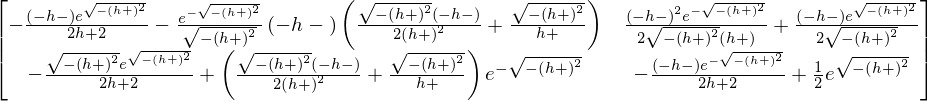

In [37]:
exp(-A1*(θ+h))

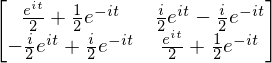

In [38]:
exp(-A1*t)

In [39]:
exp(2*t)

In [40]:
exp(2*t).diff(t)

In [42]:
from sympy.integrals.transforms import laplace_transform
from sympy import sin, cos

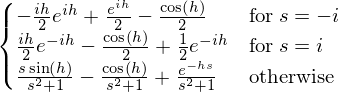

In [43]:
integrate(sin(θ + h)*exp(s*θ), (θ, -h, 0))

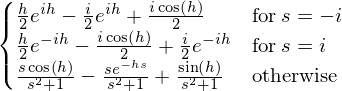

In [44]:
integrate(cos(θ + h)*exp(s*θ), (θ, -h, 0))

In [45]:
PC = s**2 + 1 + k1*I*s*sin(h) - k1*I*cos(h) + k1*I*exp(-s*h) + k2*sin(h) + k2*s*cos(h) - k2*s*exp(-s*h)
PC

In [47]:
PC.subs(h, 1).subs(s, I*ω)

In [48]:
PC.subs(h, 1).subs(s, 0)

In [56]:
om = linspace(-10, 10, 1000)
f2 = lambda om: (om**2 - 1)/(-om**2*sin(1) + 2*om*sin(om) + sin(1))
f1 = lambda k, om: k*om

k2c = [f2(o) for o in om]
k1c = [f1(o, k) for o, k in zip(om, k2c)]

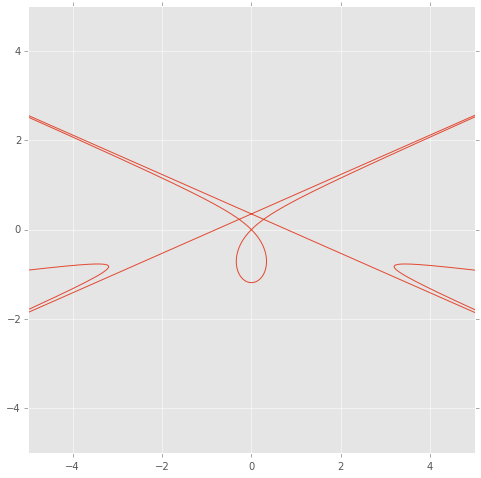

In [57]:
fig = figure(figsize=(8,8))
plot(k1c, k2c)
ax = fig.gca()
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)